<a href="https://colab.research.google.com/github/mariasakorafou/maria1/blob/main/CyberThreatHunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

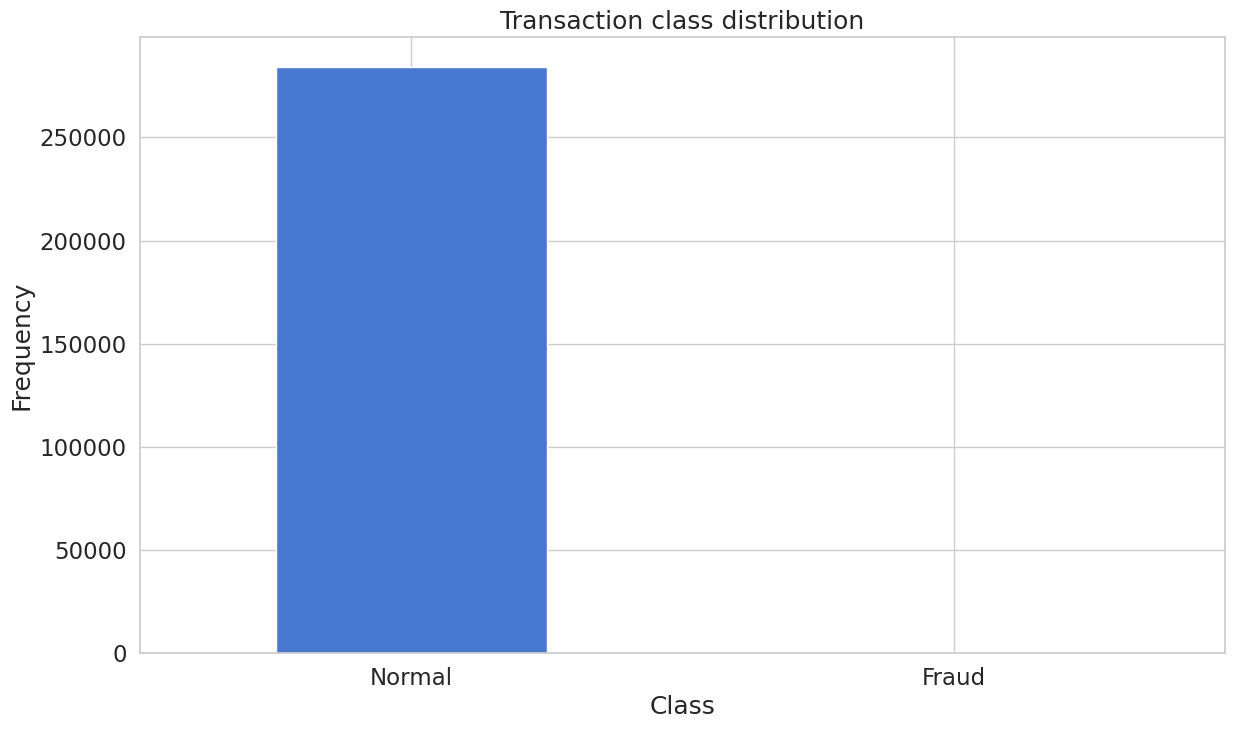

In [1]:

# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
X = data.drop(['Class'], axis=1)
y = data['Class']

# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = data['Class'].value_counts(sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# δημιουργία Random Forest αλγορίθμου και μείωση σε 20 του δείκτη επειδή είχε διακοπή
model = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=RANDOM_SEED)



# εκπαίδευση αλγόριθμου
model.fit(X_train, y_train)

# πρόβλεψη συνόλου δοκιμής
y_pred = model.predict(X_test)

# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)

In [2]:
# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [3]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=LABELS))


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Fraud       0.94      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



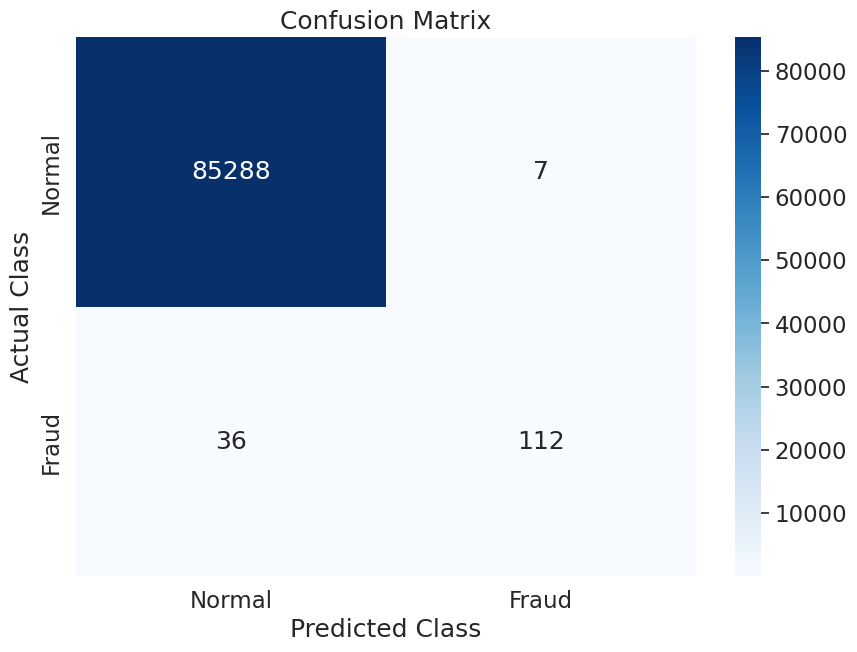

In [4]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()